<a href="https://colab.research.google.com/github/kushagra-93/Deep-Learning-Projects/blob/main/3_MNIST_Digit_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST data from keras.dataset

In [4]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
type(X_train)

numpy.ndarray

In [6]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images

Test data = 10,000 images

image dimension = 28 x 28

Number of channel = 1 (grayscale)

In [7]:
#printing the 10th image
print(X_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

In [9]:
print(X_train[9].shape)

(28, 28)


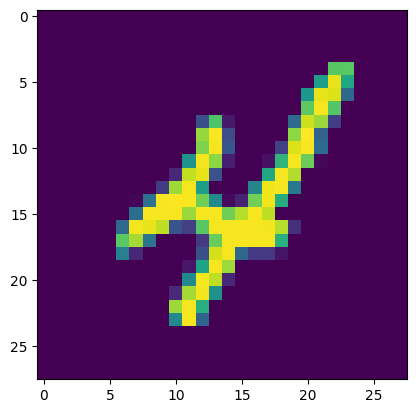

4


In [10]:
# displaying the image

plt.imshow(X_train[9])
plt.show()

# print the corresponding label
print(Y_train[9])

Image Labels

In [11]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [12]:
#unique value in Y

print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


#### We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [13]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [14]:
#printing the 10th image
print(X_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [16]:
# setting up the layers of the Neural  Network
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='sigmoid'))


In [17]:
#compiling the NN
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2914 - accuracy: 0.9153
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1381 - accuracy: 0.9593
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1034 - accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0825 - accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0693 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0594 - accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9841
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442 - accuracy: 0.9856
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0393 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.03

In [19]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0994 - accuracy: 0.9759
0.9758999943733215


In [20]:
print(X_test.shape)

(10000, 28, 28)


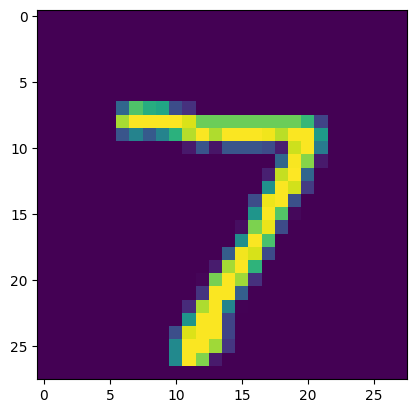

In [21]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [22]:
print(Y_test[0])

7


In [23]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [24]:
print(Y_pred.shape)

(10000, 10)


In [25]:
print(Y_pred[0])

[3.0768879e-03 9.7851735e-05 1.5608324e-01 9.8699099e-01 6.2594532e-05
 4.2204183e-02 4.1685158e-09 9.9999744e-01 9.9247172e-02 8.2572043e-02]


model.predict() gives the prediction probability of each class for that data point

In [26]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [27]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

## Confusion Matrix

In [28]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [29]:
print(conf_mat)

tf.Tensor(
[[ 965    0    1    0    2    4    4    1    3    0]
 [   0 1119    4    1    0    2    4    1    4    0]
 [   3    1 1007    4    4    1    1    6    5    0]
 [   0    0   10  972    2   12    0    6    3    5]
 [   1    0    2    0  962    1    4    0    1   11]
 [   2    0    0    3    1  882    3    0    0    1]
 [   3    1    0    1    3    9  940    0    1    0]
 [   1    1   10    0    2    1    0 1005    1    7]
 [   4    0    5    5    7   13    1    4  927    8]
 [   2    0    0    4   11    4    0    5    3  980]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

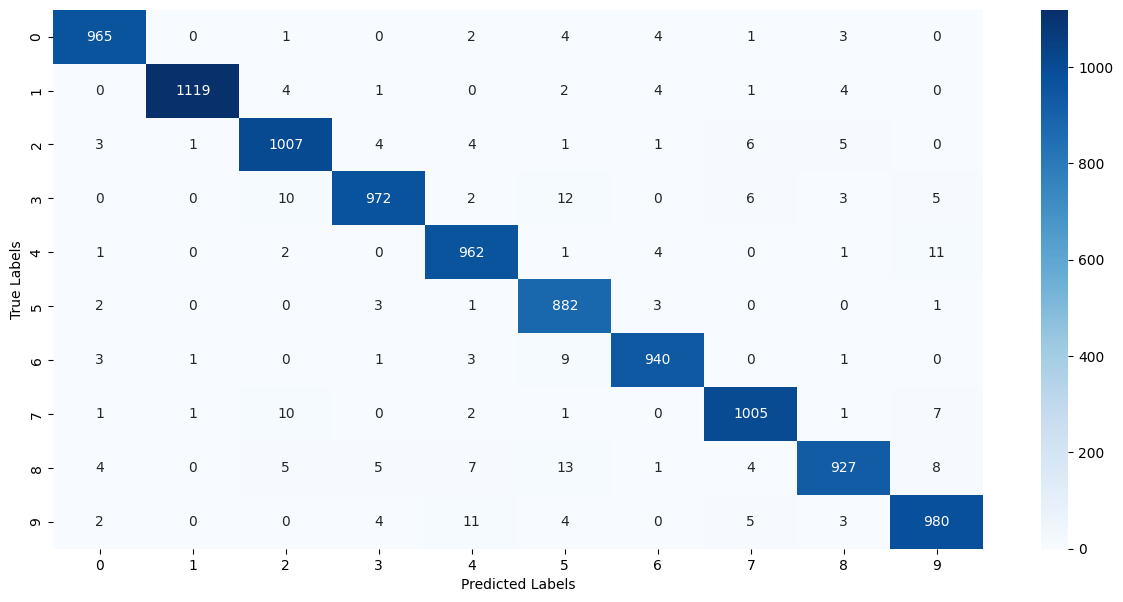

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

## Building a Predictive System

In [31]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [32]:
type(input_image)

numpy.ndarray

In [34]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


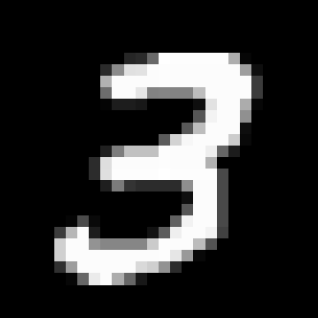

In [33]:
cv2_imshow(input_image)

In [36]:
input_image.shape

(318, 318, 3)

In [37]:
#changing RGB to Grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [38]:
grayscale.shape

(318, 318)

In [39]:
#resizing to 28 x 28
input_image_resize = cv2.resize(grayscale, (28, 28))

In [40]:
input_image_resize.shape

(28, 28)

In [41]:
cv2_imshow(input_image_resize)

In [42]:
input_image_resize = input_image_resize/255

In [43]:
type(input_image_resize)

numpy.ndarray

In [44]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [45]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 52ms/step
[[4.4197851e-16 4.5082370e-06 8.2010798e-10 1.0000000e+00 3.2686728e-10
  1.4913910e-04 3.4729735e-21 1.1683501e-06 1.7453240e-07 1.9038908e-02]]


In [46]:
input_pred_label = np.argmax(input_prediction)

In [47]:
print(input_pred_label)

3


## Predictive System

Path of the image to be predicted: /content/MNIST_digit.png


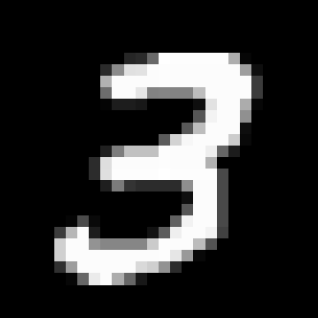

1/1 [==============================] - 0s 24ms/step
The Handwritten Digit is recognised as  3


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)